In [6]:
# Necessary imports
import pandas as pd
import numpy as np
import datetime
import math
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!ls

collect_data.py                p2_gis_preprocess.ipynb
dataset                        p2_map.ipynb
gis_dataset                    p2_model.ipynb
images                         p2_presentation.key
map                            p2_presentation.pdf
p2_chicago_car_model.ipynb     p2_presentation.pptx
p2_crash_data_preprocess.ipynb project2.ipynb
p2_crash_eda.ipynb             visualization.ipynb


In [8]:
car_accident = pd.read_pickle('./dataset/chicago_crash.pkl')

### Top 20 zipcodes with high accidents

Text(0, 0.5, 'number of accidents')

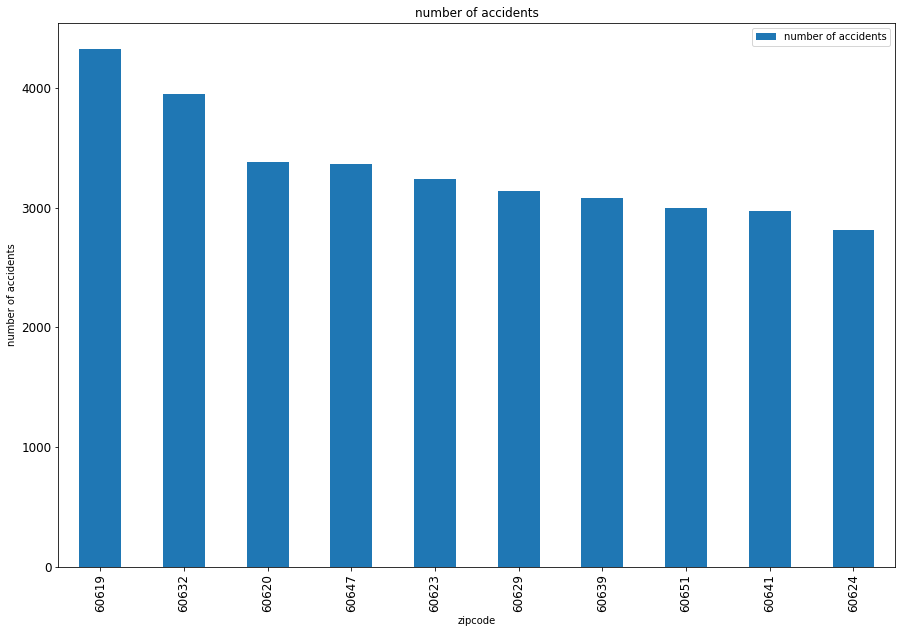

In [9]:
value_counts = car_accident['zipcode'].value_counts()
df_top20 = value_counts.rename_axis('zipcode').reset_index(name='number of accidents')
df_top20 = df_top20.sort_values(['number of accidents'], ascending=False)
df_top20 = df_top20[:10]

ax = df_top20.set_index('zipcode')[:20].plot(kind='bar', title ="number of accidents",\
                                             figsize=(15, 10), legend=True, fontsize=12)
 
ax.set_xlabel("zipcode")
ax.set_ylabel("number of accidents")

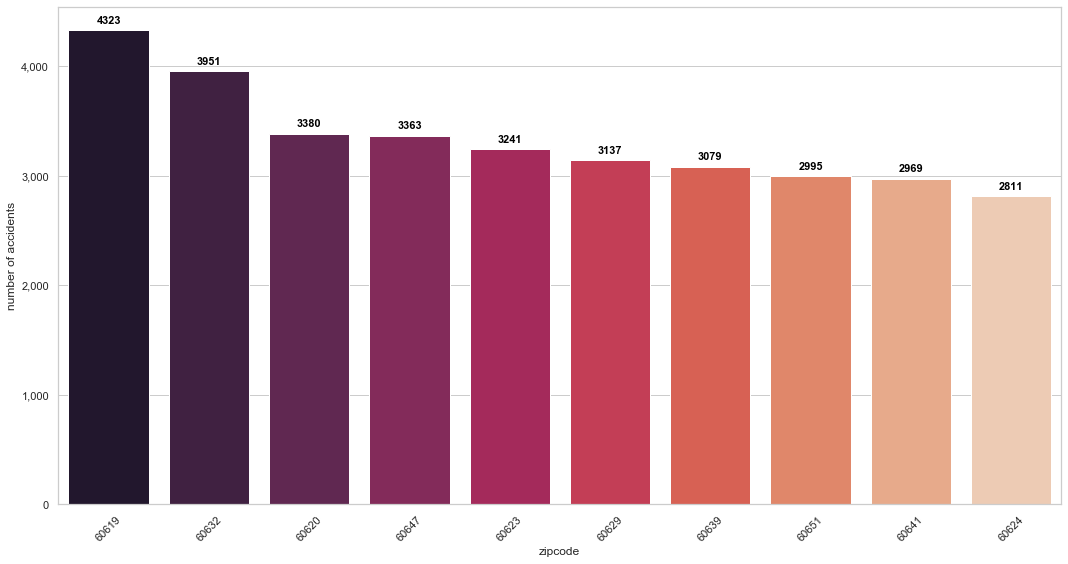

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# plot barh chart with index as x values
#ax = sns.barplot( x="zipcode", y="number of accidents" , data=df_top20, \
#                 order=df_top20['zipcode'], palette = sns.color_palette("husl", 1)) 


ax = sns.barplot( x="zipcode", y="number of accidents" , data=df_top20, \
                 order=df_top20['zipcode'], palette="rocket")


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="zipcode", ylabel='number of accidents')

# add proper Dim values as x labels
ax.set_xticklabels(df_top20['zipcode'])
for item in ax.get_xticklabels(): item.set_rotation(45)

# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points',fontweight='bold')
plt.tight_layout()
plt.show()

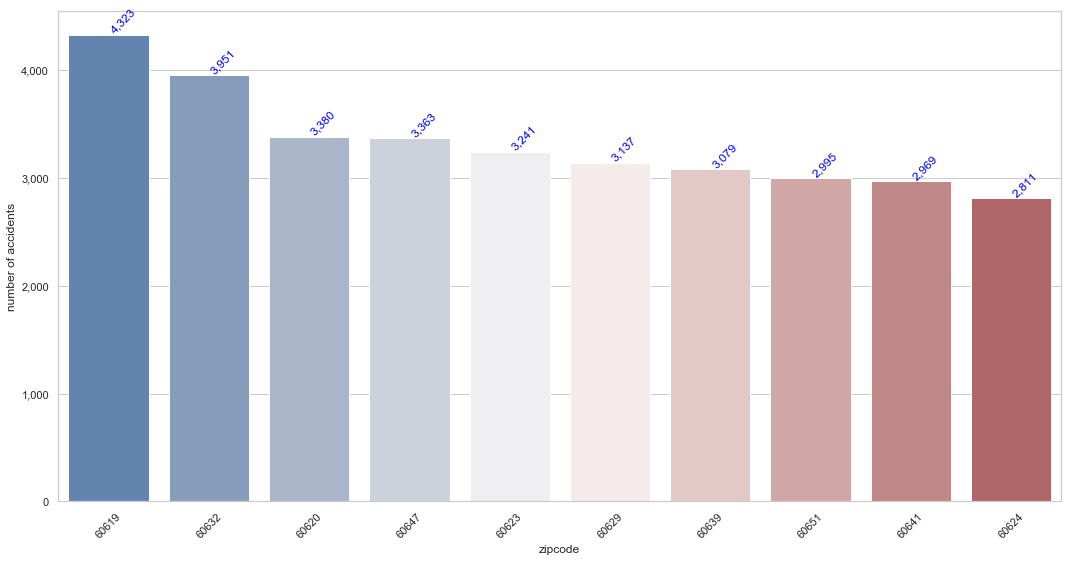

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# plot barh chart with index as x values
#ax = sns.barplot( x="zipcode", y="number of accidents" , data=df_top20, \
#                 order=df_top20['zipcode'], palette = sns.color_palette("husl", 1)) 


ax = sns.barplot( x="zipcode", y="number of accidents" , data=df_top20, \
                 order=df_top20['zipcode'], palette="vlag")


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="zipcode", ylabel='number of accidents')

# add proper Dim values as x labels
ax.set_xticklabels(df_top20['zipcode'])
for item in ax.get_xticklabels(): item.set_rotation(45)


#Adding respective values to the top of each bar
for i, v in enumerate(df_top20['number of accidents'].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='blue', va ='bottom', rotation=45)
    
    

plt.tight_layout()
plt.show()

In [12]:
value_counts[:20]

60619    4323
60632    3951
60620    3380
60647    3363
60623    3241
60629    3137
60639    3079
60651    2995
60641    2969
60624    2811
60608    2809
60612    2744
60636    2551
60618    2542
60607    2523
60611    2480
60644    2445
60657    2438
60616    2420
60630    2389
Name: zipcode, dtype: int64

In [13]:
df = pd.read_pickle('./dataset/input.pkl')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 144 to 935
Data columns (total 22 columns):
num_accident                     720 non-null float64
DARKNESS                         720 non-null float64
NOT DARKNESS                     720 non-null float64
percent_accident_at_night        720 non-null float64
NOT SNOW                         720 non-null float64
SNOW                             720 non-null float64
percent_accident_in_snow         720 non-null float64
lat                              720 non-null float64
lng                              720 non-null float64
zipcode_location                 720 non-null object
city                             720 non-null object
state_name                       720 non-null object
population                       720 non-null float64
density                          720 non-null float64
num_potholes                     720 non-null float64
non traffic                      720 non-null float64
traffic                         

In [15]:
df.isna().sum()

num_accident                     0
DARKNESS                         0
NOT DARKNESS                     0
percent_accident_at_night        0
NOT SNOW                         0
SNOW                             0
percent_accident_in_snow         0
lat                              0
lng                              0
zipcode_location                 0
city                             0
state_name                       0
population                       0
density                          0
num_potholes                     0
non traffic                      0
traffic                          0
percent_traffic_related_crime    0
intersection_count               0
num_crime                        0
zipcode                          0
month                            0
dtype: int64

In [16]:
df.columns

Index(['num_accident', 'DARKNESS', 'NOT DARKNESS', 'percent_accident_at_night',
       'NOT SNOW', 'SNOW', 'percent_accident_in_snow', 'lat', 'lng',
       'zipcode_location', 'city', 'state_name', 'population', 'density',
       'num_potholes', 'non traffic', 'traffic',
       'percent_traffic_related_crime', 'intersection_count', 'num_crime',
       'zipcode', 'month'],
      dtype='object')

In [19]:
df = df[['num_accident', 'DARKNESS', 'NOT DARKNESS', 'percent_accident_at_night',
       'NOT SNOW', 'SNOW', 'percent_accident_in_snow', 'lat', 'lng',
        'population', 'density', 'num_potholes', 'non traffic', 'traffic',
       'percent_traffic_related_crime', 'num_crime', 'intersection_count']]

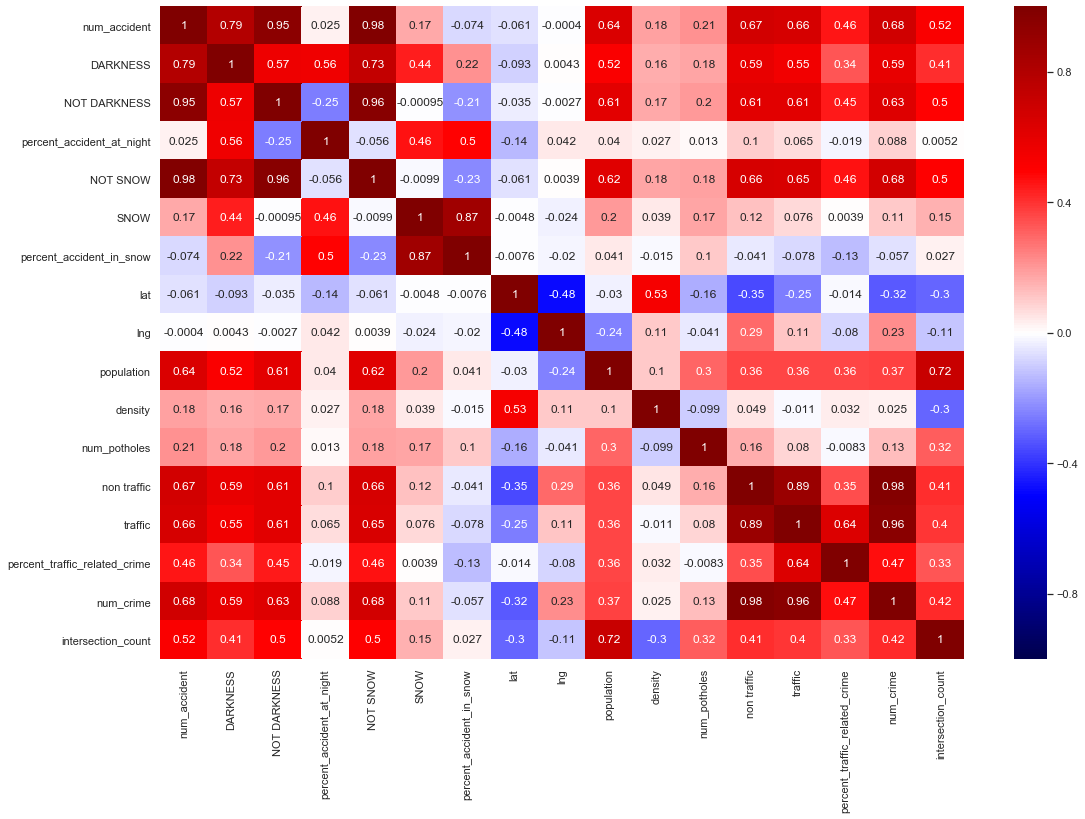

In [20]:
plt.figure(figsize=(18, 12))
sns.heatmap(df .corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

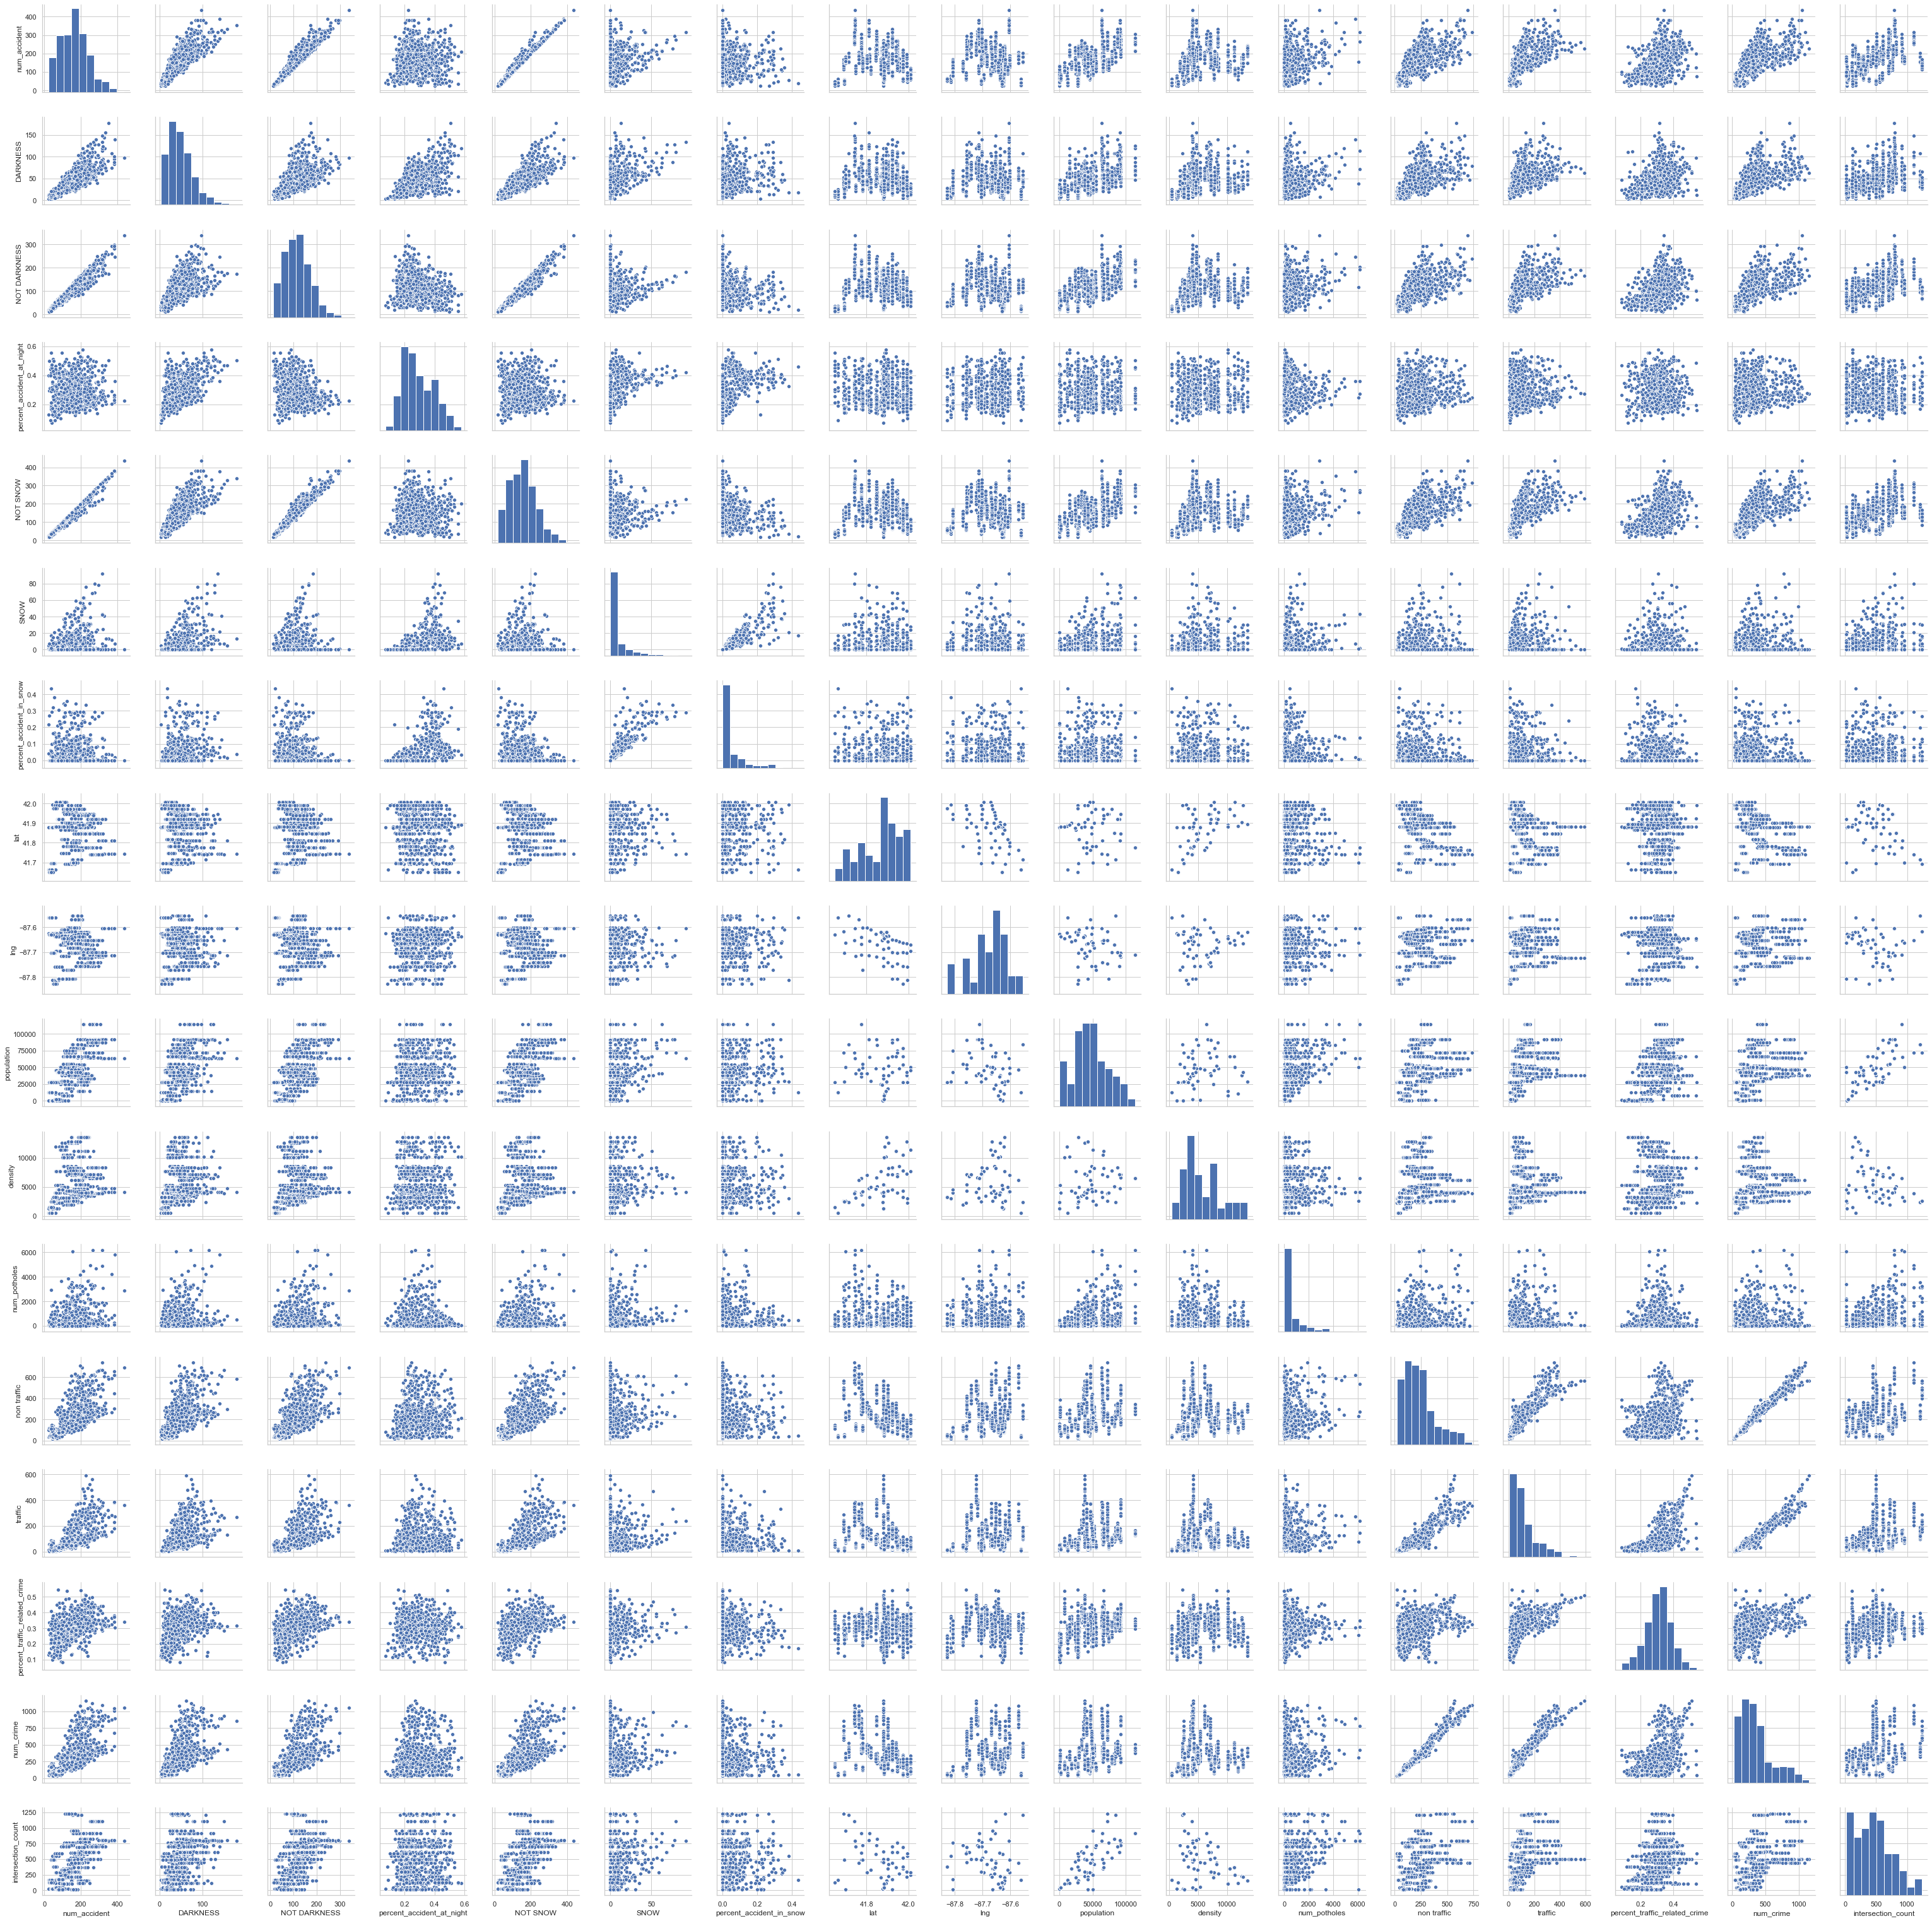

In [21]:
sns.pairplot(df)

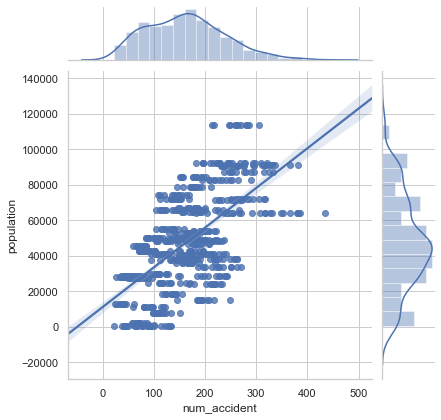

In [22]:
sns.jointplot('num_accident', 'population', kind="regplot", data=df) 

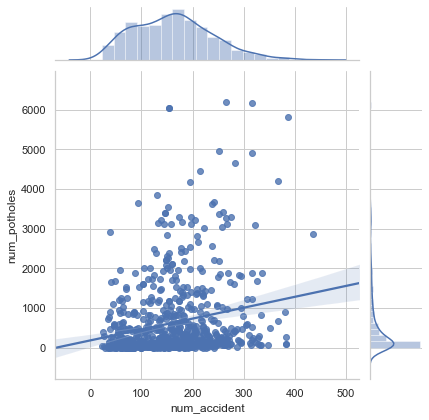

In [23]:
sns.jointplot('num_accident', 'num_potholes', kind="regplot", data=df) 

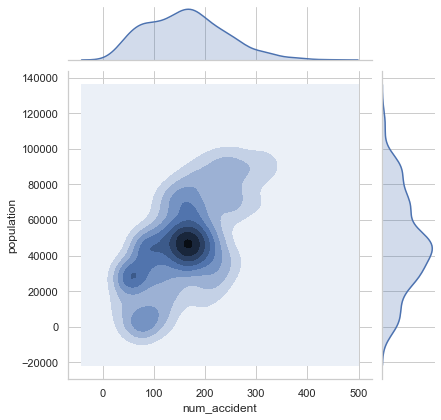

In [24]:
sns.jointplot('num_accident', 'population', kind="kde", data=df)

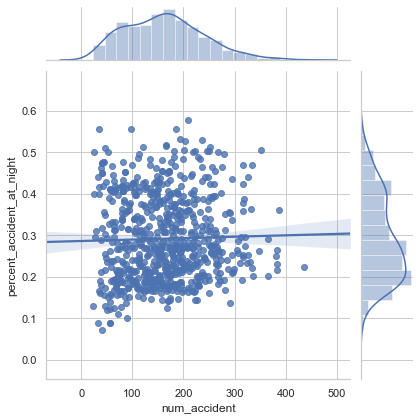

In [25]:
sns.jointplot('num_accident', 'percent_accident_at_night', kind="regplot", data=df) 

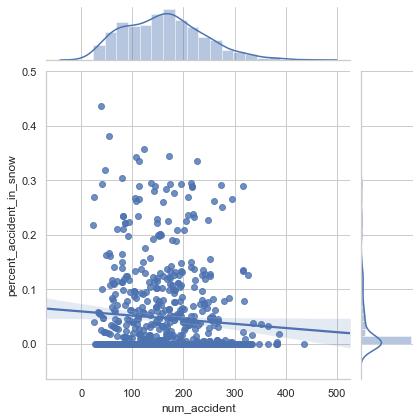

In [26]:
sns.jointplot('num_accident', 'percent_accident_in_snow', kind="regplot", data=df) 

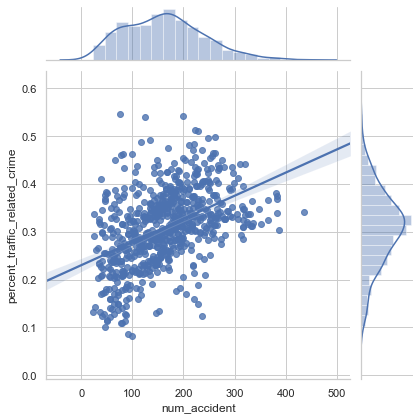

In [27]:
sns.jointplot('num_accident', 'percent_traffic_related_crime', kind="regplot", data=df) 

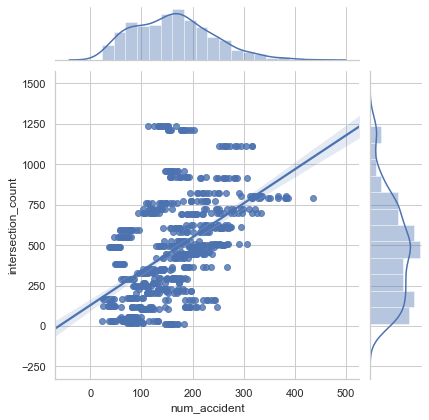

In [28]:
sns.jointplot('num_accident', 'intersection_count', kind="regplot", data=df)